In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import svm

import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

mnist_path = 'train_mnist.csv'
mnist_df = pd.read_csv(mnist_path, header=None)


In [64]:
mnist_df.tail()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
mnist_df=mnist_df.rename(index=int, columns={0: "class"})

In [66]:
mnist_df.tail()

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
a=mnist_df['class']

In [68]:
del mnist_df['class']

In [69]:
mnist_df.insert(784,'class',a)

In [70]:
mnist_df.tail()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,class
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
41999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
42000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [71]:
mnist_df = mnist_df.ix[1:]

In [72]:
mnist=mnist_df.as_matrix()

In [73]:
mnist.shape

(42000, 785)

In [74]:
mnist[:5]

array([['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '4'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype=object)

In [75]:

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(mnist[:,0:784],mnist[:,784], test_size=0.25, random_state=42)

X_train75 = X_train.astype(int)
y_train75 = y_train.astype(int)
X_test25 = X_test.astype(int)
y_test25 = y_test.astype(int)

In [97]:
import statistics

#print the variance of dataset
print(X_train75.T[0].shape)
for i in range (0,784):
    print(statistics.variance(X_train75.T[i]))

(31500,)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.430346868155
3.52915925273
1.48114285714
0.00257142857143
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.00203174603175
1.70750721842
7.11163274621
10.5820025035
7.20682807164
24.2086732549
27.975851444
35.5822671831
35.9955751238
33.3054341317
28.0508595193
26.1497046255
31.6115965223
24.1623045438
15.9326069812
11.458828243
1.34204647061
1.07479365079
0.00714285714286
0.0
0.0
0.0
0.0
0.0
0.0
0.130031746032
0.0
1.09012415713
0.113134254199
8.95863350663
27.8728601361
62.6459616949
101.659399718
156.986870947
251.339334684
378.72848357
507.010216617
641.817956246
708.535629215
694.269551378
648.141453053
532.836938109
405.627425487
236.48550271
127.729674239
63.3715312141
17.4462333397
6.31343936441
1.35493764327
0.0
0.0
0.0
0.0
0.634981000657
0.142822302749
1.58313275151
12.4784960329
43.8463298265
97.7333563877
228.120928536
454.622522611
724.665690067
1119.48332708
1514.58679162
1926.50696209
2281.8297

In [76]:
from collections import Counter
print('Original dataset Shape {}'.format(Counter(mnist[:,784])))
print('Original dataset Shape {}'.format(Counter(y_train75)))
print('Original dataset Shape {}'.format(Counter(y_test25)))


Original dataset Shape Counter({1: 4585, 7: 4292, 3: 4261, 9: 4090, 2: 4048, 6: 4038, 0: 4025, 8: 3967, 4: 3967, 5: 3704, '2': 129, '7': 109, '0': 107, '4': 105, '6': 99, '1': 99, '9': 98, '8': 96, '5': 91, '3': 90})
Original dataset Shape Counter({1: 3538, 7: 3266, 3: 3200, 9: 3154, 6: 3127, 0: 3107, 2: 3105, 8: 3058, 4: 3048, 5: 2897})
Original dataset Shape Counter({3: 1151, 1: 1146, 7: 1135, 2: 1072, 9: 1034, 0: 1025, 4: 1024, 6: 1010, 8: 1005, 5: 898})


In [77]:
#choose 50% from the training set

X_train75_50, X_discard, y_train75_50, y_discard = train_test_split(X_train75, y_train75, test_size = 0.5)

print(len(X_train75_50))

15750


In [78]:
#Make a small dataset from the above- 
#First step is RnadomUnderSampling- as dataset is skewed

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus_75_50, y_rus_75_50, z = rus.fit_sample(X_train75_50, y_train75_50)
print('Resampled dataset Shape {}'.format(Counter(y_rus_75_50)))
print(len(y_rus_75_50))

Resampled dataset Shape Counter({0: 1467, 1: 1467, 2: 1467, 3: 1467, 4: 1467, 5: 1467, 6: 1467, 7: 1467, 8: 1467, 9: 1467})
14670


In [79]:

#choose 500 samples from 14730 samples
import random
print(len(X_rus_75_50[0]))
print(len(X_rus_75_50.T[0]))

data_50 = []
for i in range(0,784):
    data_50.append(X_rus_75_50.T[i])

    
#attaching labels    
data_50.append(y_rus_75_50.T)    

data_50  = np.array(data_50).T
print(len(data_50))

print(data_50.shape)


data_sample_50 = random.sample(list(data_50), 500)

data_sample_50 = np.array(data_sample_50)
print(data_sample_50.shape)


data_sample_50 = data_sample_50.T
X_50 = data_sample_50[0:784]
X_50 = X_50. T
print(X_50.shape)

Y_50 = data_sample_50[784]
Y_50 = Y_50.T
print(Y_50.shape)


print('Small dataset Shape from 50% of the 75%training set {}'.format(Counter(Y_50)))

784
14670
14670
(14670, 785)
(500, 785)
(500, 784)
(500,)
Small dataset Shape from 50% of the 75%training set Counter({2: 60, 0: 54, 6: 52, 9: 52, 1: 51, 5: 50, 3: 48, 8: 48, 4: 45, 7: 40})


In [80]:
#using default rbf
clf_rbf  = svm.SVC()
scores_rbf_2 = cross_val_score(clf_rbf, X_50, Y_50, cv = 2)
scores_rbf_2.mean()

0.12400198403174451

In [81]:
#using default rbf
scores_rbf_5 = cross_val_score(clf_rbf, X_50, Y_50, cv = 5)
scores_rbf_5.mean()

0.13613110679163065

In [82]:
clf_poly = svm.SVC(kernel = 'poly')
scores_poly_2 = cross_val_score(clf_poly, X_50, Y_50, cv = 2)
scores_poly_2.mean()

0.79005264084225346

In [83]:
scores_poly_5 = cross_val_score(clf_poly, X_50, Y_50, cv = 5)
scores_poly_5.mean()

0.83238738257789358

In [84]:
clf_linear = svm.SVC(kernel = 'linear')
scores_linear_2 = cross_val_score(clf_linear, X_50, Y_50, cv = 2)
scores_linear_2.mean()

0.86010976175618814

In [85]:
scores_linear_5 = cross_val_score(clf_linear, X_50, Y_50, cv = 5)
scores_linear_5.mean()

0.88207710020250718

In [86]:
clf_sigmoid = svm.SVC(kernel = 'sigmoid')
scores_sigmoid_2 = cross_val_score(clf_sigmoid, X_50, Y_50, cv = 2)
scores_sigmoid_2.mean()

0.12000192003072049

In [87]:
scores_sigmoid_5 = cross_val_score(clf_sigmoid, X_50, Y_50, cv = 5)
scores_sigmoid_5.mean()

0.12006244659809676

In [112]:
#since the linear kernel gives the best scores


from sklearn.model_selection import GridSearchCV
from time import time

param_grid = {"C": [1,10,100,1000],
              "kernel":['poly','linear','rbf'],
              "degree": [3, 4,5,6],
              "decision_function_shape" : ['ovo', 'ovr'] }

# run grid search
grid_search = GridSearchCV(clf_rbf, param_grid=param_grid)
start = time()
grid_search.fit(X_50, Y_50)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))


GridSearchCV took 81.33 seconds for 96 candidate parameter settings.


In [113]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.870 (std: 0.020)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 3, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.870 (std: 0.020)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 4, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.870 (std: 0.020)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 5, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.870 (std: 0.020)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 6, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.870 (std: 0.020)
Parameters: {'decision_function_shape': 'ovr', 'C': 1, 'degree': 3, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.870 (std: 0.020)
Parameters: {'decision_function_shape': 'ovr', 'C': 1, 'degree': 4, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.870 (std: 0.020)
Parameters: {'decision_function_shape':

In [26]:
#preparing a small test dataset from the 25% of the total dataset with stratified sampling

X_test25_small, X_discard, y_test25_small, y_discard = train_test_split(X_test25, y_test25, test_size=0.70, stratify = y_test25)

print(len(X_test25_small))

print('Small test dataset Shape {}'.format(Counter(y_test25_small)))

3150
Small test dataset Shape Counter({3: 345, 1: 344, 7: 341, 2: 322, 9: 310, 0: 307, 4: 307, 6: 303, 8: 302, 5: 269})


In [102]:
#linear kernel gives the best scores
clf_linear = svm.SVC(decision_function_shape='ovo', C= 1, degree= 3, kernel= 'linear')
scores_linear_2_test = cross_val_score(clf_linear, X_test25_small, y_test25_small, cv = 2)
scores_linear_2_test.mean()

0.88918478313451177

In [103]:
scores_linear_5_test = cross_val_score(clf_linear, X_test25_small, y_test25_small, cv = 5)
scores_linear_5_test.mean()

0.89904923442178908

In [104]:
#find the accuracy score

from sklearn.metrics import accuracy_score

clf_linear.fit(X_50, Y_50)
y_pred_50 = clf_linear.predict(X_test25_small)
accuracy_score(y_test25_small, y_pred_50)

0.87301587301587302

Confusion matrix, without normalization
[[284   0   3   2   2   8   7   0   1   0]
 [  0 340   1   0   0   0   0   1   2   0]
 [  5  10 284   5   5   3   3   2   4   1]
 [  2   4  12 288   0  17   6   3   8   5]
 [  2   4   2   1 282   1   2   2   0  11]
 [  3   2   4  17   1 228   6   0   3   5]
 [  4   1   5   5   3   3 280   1   1   0]
 [  2  14   7   4  11   1   0 284   0  18]
 [  0   7  11  14   5  30   1   1 230   3]
 [  2   1   4   6  17   6   1  16   7 250]]
Normalized confusion matrix
[[ 0.93  0.    0.01  0.01  0.01  0.03  0.02  0.    0.    0.  ]
 [ 0.    0.99  0.    0.    0.    0.    0.    0.    0.01  0.  ]
 [ 0.02  0.03  0.88  0.02  0.02  0.01  0.01  0.01  0.01  0.  ]
 [ 0.01  0.01  0.03  0.83  0.    0.05  0.02  0.01  0.02  0.01]
 [ 0.01  0.01  0.01  0.    0.92  0.    0.01  0.01  0.    0.04]
 [ 0.01  0.01  0.01  0.06  0.    0.85  0.02  0.    0.01  0.02]
 [ 0.01  0.    0.02  0.02  0.01  0.01  0.92  0.    0.    0.  ]
 [ 0.01  0.04  0.02  0.01  0.03  0.    0.    0.83  0.    0.0

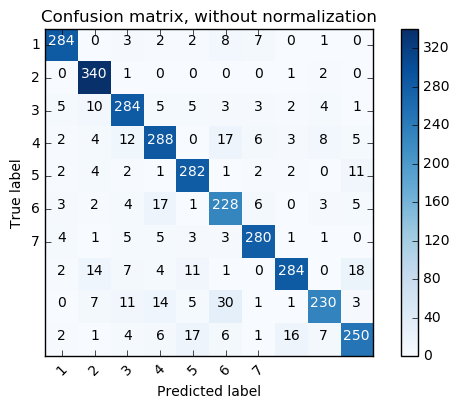

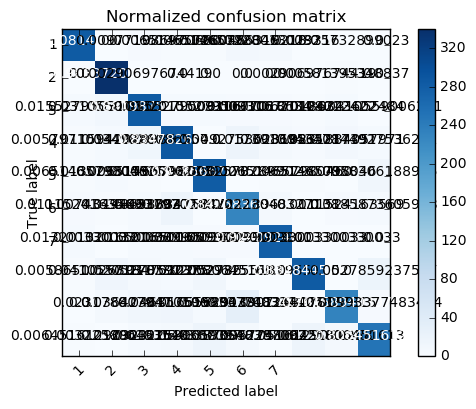

In [110]:
#Confusion matrix 
#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
from sklearn.metrics import confusion_matrix
import itertools
names =   ['1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test25_small, y_pred_50)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [31]:
#choose 75% from the total training set

X_train75_75, X_discard, y_train75_75, y_discard = train_test_split(X_train75, y_train75, test_size = 0.25)

print(len(X_train75_75))

23625


In [32]:
#Make a small dataset from the above- 
#First step is RnadomUnderSampling- as dataset is skewed

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus_75_75, y_rus_75_75, idx_rus_75_75 = rus.fit_sample(X_train75_75, y_train75_75)
print('Resampled dataset Shape {}'.format(Counter(y_rus_75_75)))
print(len(y_rus_75_75))

Resampled dataset Shape Counter({0: 2218, 1: 2218, 2: 2218, 3: 2218, 4: 2218, 5: 2218, 6: 2218, 7: 2218, 8: 2218, 9: 2218})
22180


In [34]:

#choose 750 samples from 10689 samples
import random
print(len(X_rus_75_75[0]))
print(len(X_rus_75_75.T[0]))

data_75 = []
for i in range(0,784):
    data_75.append(X_rus_75_75.T[i])

    
#attaching labels    
data_75.append(y_rus_75_75.T)    

data_75  = np.array(data_75).T
print(len(data_75))

print(data_75.shape)


data_sample_75 = random.sample(list(data_75), 750)

data_sample_75 = np.array(data_sample_75)
print(data_sample_75.shape)


data_sample_75 = data_sample_75.T
X_75 = data_sample_75[0:784]
X_75 = X_75. T
print(X_75.shape)

Y_75 = data_sample_75[784]
Y_75 = Y_75.T
print(Y_75.shape)


print('Small dataset Shape from 75% of the 75%training set {}'.format(Counter(Y_75)))

784
22180
22180
(22180, 785)
(750, 785)
(750, 784)
(750,)
Small dataset Shape from 75% of the 75%training set Counter({9: 83, 3: 80, 7: 80, 0: 75, 2: 75, 4: 75, 6: 75, 8: 75, 5: 69, 1: 63})


In [35]:
#using default rbf
clf_rbf_75 = svm.SVC(kernel = 'rbf')
scores_rbf_75_2 = cross_val_score(clf_rbf_75, X_75, Y_75, cv = 2)
scores_rbf_75_2.mean()

0.13200079653507243

In [36]:
#using default rbf
scores_rbf_75_5 = cross_val_score(clf_rbf_75, X_75, Y_75, cv = 5)
scores_rbf_75_5.mean()

0.14264087412894028

In [37]:
#using poly kernel
clf_poly_75 = svm.SVC(kernel = 'poly')
scores_poly_75_2 = cross_val_score(clf_poly_75, X_75, Y_75, cv = 2)
scores_poly_75_2.mean()

0.81996529382898675

In [38]:
scores_poly_75_5 = cross_val_score(clf_poly_75, X_75, Y_75, cv = 5)
scores_poly_75_5.mean()

0.85063792625017576

In [39]:
#using linear kernel
clf_linear_75 = svm.SVC(kernel = 'linear')
scores_linear_75_2 = cross_val_score(clf_linear_75, X_75, Y_75, cv = 2)
scores_linear_75_2.mean()

0.84402492016869468

In [40]:
scores_linear_75_5 = cross_val_score(clf_linear_75, X_75, Y_75, cv = 5)
scores_linear_75_5.mean()

0.86396314310666056

In [41]:
#using sigmoid kernel
clf_sigmoid_75 = svm.SVC(kernel = 'sigmoid')
scores_sigmoid_75_2 = cross_val_score(clf_sigmoid_75, X_75, Y_75, cv = 2)
scores_sigmoid_75_2.mean()

0.11066503566628025

In [42]:
scores_sigmoid_75_5 = cross_val_score(clf_sigmoid_75, X_75, Y_75, cv = 5)
scores_sigmoid_75_5.mean()

0.11064780056290791

In [100]:
#since the linear kernel gives the best scores


from sklearn.model_selection import GridSearchCV
from time import time

param_grid = {"C": [1,2,3,4,5],
              "kernel":['poly','linear'],
              "degree": [3, 4,5,6],
              "decision_function_shape" : ['ovo', 'ovr'] }

# run grid search
grid_search = GridSearchCV(clf_linear_75, param_grid=param_grid)
start = time()
grid_search.fit(X_75, Y_75)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 109.01 seconds for 80 candidate parameter settings.


In [105]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 3, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 4, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 5, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 6, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovr', 'C': 1, 'degree': 3, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovr', 'C': 1, 'degree': 4, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape':

In [106]:
#choosing the best kernel to test the data

clf_linear_75 = svm.SVC(decision_function_shape='ovo', C= 1, degree= 3, kernel='linear')
scores_linear_2_test_75 = cross_val_score(clf_linear_75, X_test25_small, y_test25_small, cv = 2)
scores_linear_2_test_75.mean()

0.88918478313451177

In [107]:
scores_linear_5_test_75 = cross_val_score(clf_linear_75, X_test25_small, y_test25_small, cv = 5)
scores_linear_5_test_75.mean()

0.89904923442178908

In [108]:
#find the accuracy score

from sklearn.metrics import accuracy_score

clf_linear_75.fit(X_75, Y_75)
y_pred_75 = clf_linear_75.predict(X_test25_small)
accuracy_score(y_test25_small, y_pred_75)

0.8666666666666667

Confusion matrix, without normalization
[[298   0   2   0   2   4   1   0   0   0]
 [  0 337   1   2   0   0   0   0   3   1]
 [  6   7 280   2   7   4   6   0   8   2]
 [  1   5  12 280   1  20   2   8  13   3]
 [  2   4   3   0 265   1   3   3   0  26]
 [  7   4   1  30   4 202   7   3   5   6]
 [  8   1   8   3   1   3 277   0   2   0]
 [  1   6  10   5   8   2   0 295   0  14]
 [  4   7   3  21   7   7   2   0 246   5]
 [  3   1   7   7  16   2   0  19   5 250]]
Normalized confusion matrix
[[ 0.97  0.    0.01  0.    0.01  0.01  0.    0.    0.    0.  ]
 [ 0.    0.98  0.    0.01  0.    0.    0.    0.    0.01  0.  ]
 [ 0.02  0.02  0.87  0.01  0.02  0.01  0.02  0.    0.02  0.01]
 [ 0.    0.01  0.03  0.81  0.    0.06  0.01  0.02  0.04  0.01]
 [ 0.01  0.01  0.01  0.    0.86  0.    0.01  0.01  0.    0.08]
 [ 0.03  0.01  0.    0.11  0.01  0.75  0.03  0.01  0.02  0.02]
 [ 0.03  0.    0.03  0.01  0.    0.01  0.91  0.    0.01  0.  ]
 [ 0.    0.02  0.03  0.01  0.02  0.01  0.    0.87  0.    0.0

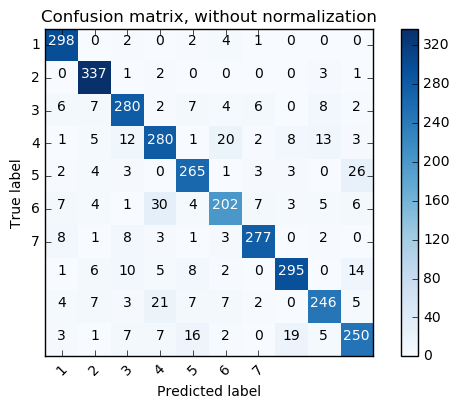

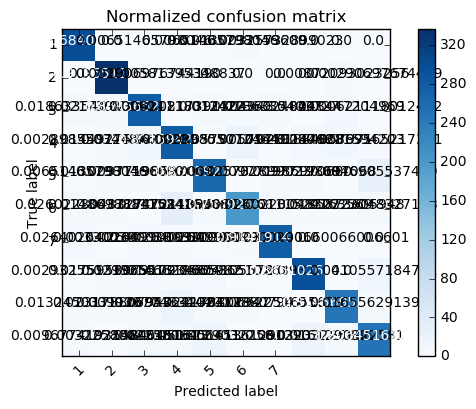

In [109]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test25_small, y_pred_75)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [48]:
#choosing 100% of the training set
#using randomundersampling and then selecting 500 samples from the that

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus_75_100, y_rus_75_100, idx_rus_75_100 = rus.fit_sample(X_train75, y_train75)
print('Resampled dataset Shape {}'.format(Counter(y_rus_75_100)))
print(len(y_rus_75_100))


Resampled dataset Shape Counter({0: 2897, 1: 2897, 2: 2897, 3: 2897, 4: 2897, 5: 2897, 6: 2897, 7: 2897, 8: 2897, 9: 2897})
28970


In [49]:
#choose 1000 samples from  samples
import random
print(len(X_rus_75_100[0]))
print(len(X_rus_75_100.T[0]))

data_100 = []
for i in range(0,784):
    data_100.append(X_rus_75_100.T[i])

    
#attaching labels    
data_100.append(y_rus_75_100.T)    

data_100  = np.array(data_100).T
print(len(data_100))

print(data_100.shape)


data_sample_100 = random.sample(list(data_100), 1000)

data_sample_100 = np.array(data_sample_100)
print(data_sample_100.shape)


data_sample_100 = data_sample_100.T
X_100 = data_sample_100[0:784]
X_100 = X_100. T
print(X_100.shape)

Y_100 = data_sample_100[784]
Y_100 = Y_100.T
print(Y_100.shape)


print('Small dataset Shape from 100% of the 75%training set {}'.format(Counter(Y_100)))

784
28970
28970
(28970, 785)
(1000, 785)
(1000, 784)
(1000,)
Small dataset Shape from 100% of the 75%training set Counter({1: 117, 7: 107, 5: 104, 3: 102, 2: 101, 4: 98, 8: 98, 0: 97, 6: 89, 9: 87})


In [50]:
#using default rbf
clf_rbf_100 = svm.SVC(kernel = 'rbf')
scores_rbf_100_2 = cross_val_score(clf_rbf_100, X_100, Y_100, cv = 2)
scores_rbf_100_2.mean()

0.12899864395118227

In [51]:
scores_rbf_100_5 = cross_val_score(clf_rbf_100, X_100, Y_100, cv = 5)
scores_rbf_100_5.mean()

0.14094862635529762

In [117]:
#finding best rbf kernel using GridSearchCV

from sklearn.model_selection import GridSearchCV
from time import time

param_grid =param_grid = {"C": [1e-2, 1, 1e2, 1e3],
                          "gamma":[1e-2, 1, 1e2, 1e3]}

# run grid search
grid_search = GridSearchCV(clf_rbf_100, param_grid=param_grid)
start = time()
grid_search.fit(X_100, Y_100)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 61.27 seconds for 16 candidate parameter settings.


In [118]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 0.01, 'C': 1}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 1, 'C': 1}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 100.0, 'C': 1}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 1000.0, 'C': 1}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 0.01, 'C': 100.0}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 1, 'C': 100.0}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 100.0, 'C': 100.0}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 1000.0, 'C': 100.0}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 0.01, 'C': 1000.0}

Model with rank: 1
Mean validation score: 0.131 (std: 0.005)
Parameters: {'gamma': 1, 'C': 1000.0

In [52]:
#using default poly
clf_poly_100 = svm.SVC(kernel = 'poly')
scores_poly_100_2 = cross_val_score(clf_poly_100, X_100, Y_100, cv = 2)
scores_poly_100_2.mean()

0.8260537379345656

In [53]:

scores_poly_100_5 = cross_val_score(clf_poly_100, X_100, Y_100, cv = 5)
scores_poly_100_5.mean()

0.87015145482115064

In [54]:
#using default linear
clf_linear_100 = svm.SVC(kernel = 'linear')
scores_linear_100_2 = cross_val_score(clf_linear_100, X_100, Y_100, cv = 2)
scores_linear_100_2.mean()

0.87901364449120167

In [55]:

scores_linear_100_5 = cross_val_score(clf_linear_100, X_100, Y_100, cv = 5)
scores_linear_100_5.mean()

0.87808715762138156

In [56]:
#using default sigmoid
clf_sigmoid_100 = svm.SVC(kernel = 'sigmoid')
scores_sigmoid_100_2 = cross_val_score(clf_sigmoid_100, X_100, Y_100, cv = 2)
scores_sigmoid_100_2.mean()

0.11699821193562968

In [57]:

scores_sigmoid_100_5 = cross_val_score(clf_sigmoid_100, X_100, Y_100, cv = 5)
scores_sigmoid_100_5.mean()

0.11699962119734478

In [114]:
from sklearn.model_selection import GridSearchCV
from time import time

param_grid =param_grid = {"C": [1,10,100,1000],
              "kernel":['poly','linear','rbf'],
              "degree": [3, 4,5,6],
              "decision_function_shape" : ['ovo', 'ovr', None] }

# run grid search
grid_search = GridSearchCV(clf_rbf_75, param_grid=param_grid)
start = time()
grid_search.fit(X_75, Y_75)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 232.82 seconds for 144 candidate parameter settings.


In [116]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 3, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 4, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 5, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovo', 'C': 1, 'degree': 6, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovr', 'C': 1, 'degree': 3, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape': 'ovr', 'C': 1, 'degree': 4, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.845 (std: 0.014)
Parameters: {'decision_function_shape':

In [58]:
#choosing the best kernel to test the data

scores_linear_2_test_100 = cross_val_score(clf_linear_100, X_test25_small, y_test25_small, cv = 2)
scores_linear_2_test_100.mean()

0.88918478313451177

In [59]:
scores_linear_5_test_100 = cross_val_score(clf_linear_100, X_test25_small, y_test25_small, cv = 5)
scores_linear_5_test_100.mean()

0.89904923442178908

In [60]:
#find the accuracy score

from sklearn.metrics import accuracy_score

clf_linear_100.fit(X_100, Y_100)
y_pred_100 = clf_linear_100.predict(X_test25_small)
accuracy_score(y_test25_small, y_pred_100)

0.88857142857142857

Confusion matrix, without normalization
[[292   0   2   1   2   3   1   0   5   1]
 [  0 337   0   1   1   1   0   0   3   1]
 [  1   5 291  11   9   0   1   2   2   0]
 [  1   4  13 280   0  20   1   9   9   8]
 [  2   5   1   0 289   0   5   0   0   5]
 [  9   3   1  15   1 222   2   1   9   6]
 [  9   0  11   1   5   4 271   0   2   0]
 [  2   7   4   3   5   3   0 305   0  12]
 [  0   8   3   9   4  11   0   2 263   2]
 [  4   0   2   5  26   3   0  18   3 249]]
Normalized confusion matrix
[[ 0.95  0.    0.01  0.    0.01  0.01  0.    0.    0.02  0.  ]
 [ 0.    0.98  0.    0.    0.    0.    0.    0.    0.01  0.  ]
 [ 0.    0.02  0.9   0.03  0.03  0.    0.    0.01  0.01  0.  ]
 [ 0.    0.01  0.04  0.81  0.    0.06  0.    0.03  0.03  0.02]
 [ 0.01  0.02  0.    0.    0.94  0.    0.02  0.    0.    0.02]
 [ 0.03  0.01  0.    0.06  0.    0.83  0.01  0.    0.03  0.02]
 [ 0.03  0.    0.04  0.    0.02  0.01  0.89  0.    0.01  0.  ]
 [ 0.01  0.02  0.01  0.01  0.01  0.01  0.    0.89  0.    0.0

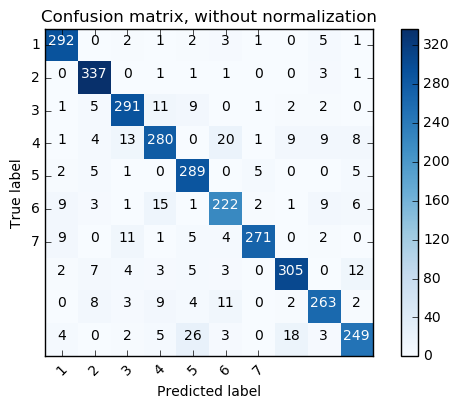

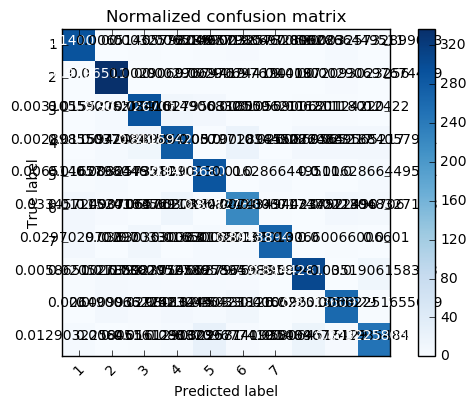

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test25_small, y_pred_100)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = names, normalize=True, title='Normalized confusion matrix')
plt.show()